<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 139.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 180.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 128.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 141.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 142.4 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head(3)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
# --- Step 1: Count missing values per column ---
missing_df = df[['Employment', 'JobSat', 'RemoteWork']].isna().sum().reset_index()
missing_df.columns = ["Column", "MissingCount"]

print("Missing value counts per column:")
print(missing_df)
print(df.shape)
print(df[['Employment', 'JobSat', 'RemoteWork']].dtypes)

Missing value counts per column:
       Column  MissingCount
0  Employment             0
1      JobSat         36311
2  RemoteWork         10631
(65437, 114)
Employment     object
JobSat        float64
RemoteWork     object
dtype: object


In [4]:
df2 = df.copy()
# Fill missing value by average value (mean) for int column
import math
col_int = math.ceil(df2['JobSat'].mean())
df2['JobSat'].fillna(col_int, inplace=True)
# Fill missing value by most frequent value (mode) for category columns
col_cat = ['RemoteWork']
for fill in col_cat:
    mode = df2[fill].mode()[0]
    df2[fill].fillna(mode, inplace=True)

print(df2[['JobSat', 'RemoteWork']])

# Count missing values after fillna
missing_fill = df2[['JobSat', 'RemoteWork']].isna().sum().reset_index()
missing_fill.columns = ["Column", "MissingCount"]

print("Missing value counts per column:")
print(missing_fill)
print(df2[['Employment', 'JobSat', 'RemoteWork']].dtypes)


       JobSat                            RemoteWork
0         7.0                                Remote
1         7.0                                Remote
2         7.0                                Remote
3         7.0  Hybrid (some remote, some in-person)
4         7.0  Hybrid (some remote, some in-person)
...       ...                                   ...
65432     7.0                                Remote
65433     7.0                                Remote
65434     7.0                             In-person
65435     7.0  Hybrid (some remote, some in-person)
65436     7.0  Hybrid (some remote, some in-person)

[65437 rows x 2 columns]
Missing value counts per column:
       Column  MissingCount
0      JobSat             0
1  RemoteWork             0
Employment     object
JobSat        float64
RemoteWork     object
dtype: object


/tmp/ipykernel_384/3932245121.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['JobSat'].fillna(col_int, inplace=True)
/tmp/ipykernel_384/3932245121.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_384/1939601173.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2.groupby("ExperienceRange")["JobSat"]


Median Job Satisfaction by Experience Range:
  ExperienceRange  MedianJobSat
0         0-5 yrs           7.0
1        5-10 yrs           7.0
2       10-20 yrs           7.0
3         20+ yrs           7.0


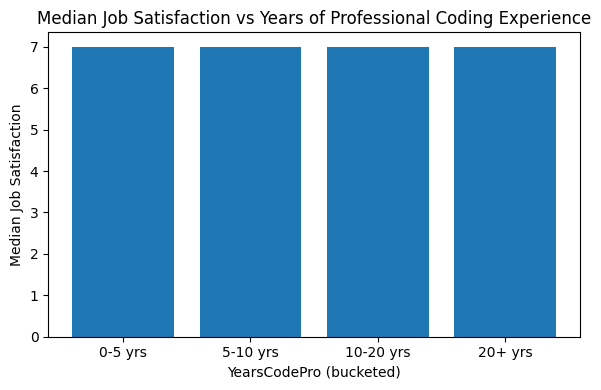

In [5]:
# Convert YearsCodePro to numeric (coerce invalid strings to NaN)
df2["YearsCodePro"] = pd.to_numeric(df2["YearsCodePro"], errors="coerce")

# Convert JobSat to numeric if possible (if already numeric this does nothing)
df2["JobSat"] = pd.to_numeric(df2["JobSat"], errors="coerce")

# Drop rows where we don't have both values
df2 = df2.dropna(subset=["YearsCodePro", "JobSat"])


# --- 2. Create experience ranges ---

bins = [0, 5, 10, 20, float("inf")]
labels = ["0-5 yrs", "5-10 yrs", "10-20 yrs", "20+ yrs"]

df2["ExperienceRange"] = pd.cut(
    df2["YearsCodePro"],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=False  # [0,5), [5,10), [10,20), [20,inf)
)


# --- 3. Calculate median JobSat by experience range ---

median_job_sat = (
    df2.groupby("ExperienceRange")["JobSat"]
       .median()
       .reset_index()
       .rename(columns={"JobSat": "MedianJobSat"})
)

print("Median Job Satisfaction by Experience Range:")
print(median_job_sat)


# --- 4. Visualize the relationship ---

plt.figure(figsize=(6,4))
plt.bar(median_job_sat["ExperienceRange"], median_job_sat["MedianJobSat"])
plt.title("Median Job Satisfaction vs Years of Professional Coding Experience")
plt.xlabel("YearsCodePro (bucketed)")
plt.ylabel("Median Job Satisfaction")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Median Job Satisfaction by Experience Range:
  ExperienceRange  MedianJobSat
0         0-5 yrs           7.0
1        5-10 yrs           7.0
2       10-20 yrs           7.0
3         20+ yrs           8.0


/tmp/ipykernel_384/3431712330.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("ExperienceRange")["JobSat"]


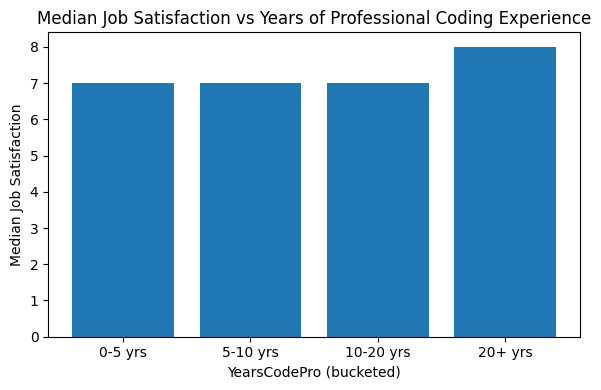

In [6]:
# Convert YearsCodePro to numeric (coerce invalid strings to NaN)
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")

# Convert JobSat to numeric if possible (if already numeric this does nothing)
df["JobSat"] = pd.to_numeric(df["JobSat"], errors="coerce")

# Drop rows where we don't have both values
df = df.dropna(subset=["YearsCodePro", "JobSat"])


# --- 2. Create experience ranges ---

bins = [0, 5, 10, 20, float("inf")]
labels = ["0-5 yrs", "5-10 yrs", "10-20 yrs", "20+ yrs"]

df["ExperienceRange"] = pd.cut(
    df2["YearsCodePro"],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=False  # [0,5), [5,10), [10,20), [20,inf)
)


# --- 3. Calculate median JobSat by experience range ---

median_job_sat = (
    df.groupby("ExperienceRange")["JobSat"]
       .median()
       .reset_index()
       .rename(columns={"JobSat": "MedianJobSat"})
)

print("Median Job Satisfaction by Experience Range:")
print(median_job_sat)


# --- 4. Visualize the relationship ---

plt.figure(figsize=(6,4))
plt.bar(median_job_sat["ExperienceRange"], median_job_sat["MedianJobSat"])
plt.title("Median Job Satisfaction vs Years of Professional Coding Experience")
plt.xlabel("YearsCodePro (bucketed)")
plt.ylabel("Median Job Satisfaction")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_384/272754860.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="JobSat", order=df["JobSat"].value_counts().index, palette="viridis")


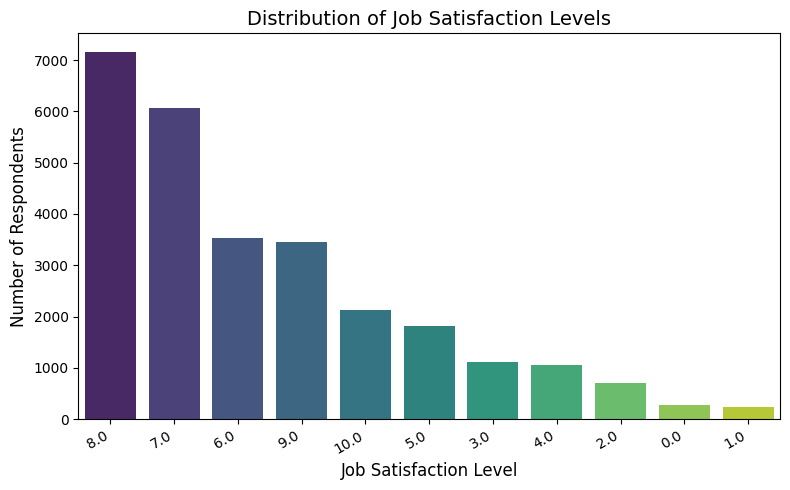

In [7]:
# --- Step 2: Create count plot ---
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="JobSat", order=df["JobSat"].value_counts().index, palette="viridis")

# --- Step 3: Add title and labels ---
plt.title("Distribution of Job Satisfaction Levels", fontsize=14)
plt.xlabel("Job Satisfaction Level", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_384/870831056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


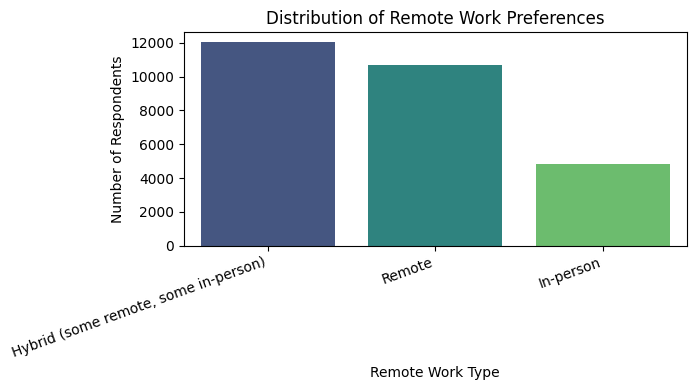


Remote Work Preference by Employment Type (%):
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                 44.7   
Employed, full-time;Employed, part-time                                             39.8   
Employed, full-time;Independent contractor, fre...                                  36.0   
Employed, full-time;Independent contractor, fre...                                  46.0   
Employed, full-time;Independent contractor, fre...                                   0.0   

RemoteWork                                          In-person  Remote  
Employment                                                             
Employed, full-time                                      18.9    36.3  
Employed, full-time;Employed, part-time                  12.7    47.5  
Employed, full-time

In [8]:
# --- 1. Drop missing values for relevant columns ---
df = df.dropna(subset=["RemoteWork", "Employment"])

# --- 2. Count plot for RemoteWork distribution ---
plt.figure(figsize=(7,4))
sns.countplot(
    data=df,
    x="RemoteWork",
    order=df["RemoteWork"].value_counts().index,
    palette="viridis"
)
plt.title("Distribution of Remote Work Preferences")
plt.xlabel("Remote Work Type")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()

# --- 3. Cross-tabulate RemoteWork vs Employment type ---
crosstab_emp = pd.crosstab(df["Employment"], df["RemoteWork"], normalize="index") * 100
crosstab_emp = crosstab_emp.round(1)

print("\nRemote Work Preference by Employment Type (%):")
print(crosstab_emp.head())

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


Top languages in United States of America:
                  Language  Count
0               JavaScript   3394
1                      SQL   3103
2                   Python   2957
3                 HTML/CSS   2814
4  Bash/Shell (all shells)   2468
5               TypeScript   2280
6                       C#   1695
7                     Java   1354
8                      C++   1060
9               PowerShell    985


/tmp/ipykernel_384/555736384.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


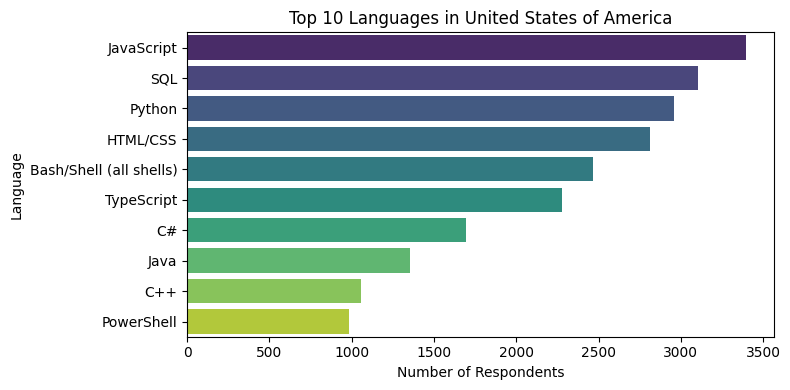

In [9]:
# --- choose a region or country you want to analyze ---
target_region = "United States of America"  # change this to any country/region you want

# keep only rows from that region (drop missing)
df_region = df.dropna(subset=["Country", "LanguageHaveWorkedWith"])
df_region = df_region[df_region["Country"] == target_region]

# split the semicolon-separated language list into individual rows
lang_series = (
    df_region["LanguageHaveWorkedWith"]
    .str.split(";")
    .explode()
    .str.strip()
)

# count frequency of each language
lang_counts = lang_series.value_counts().reset_index()
lang_counts.columns = ["Language", "Count"]

print(f"Top languages in {target_region}:")
print(lang_counts.head(10))

# visualize top N languages
top_n = 10
plt.figure(figsize=(8,4))
sns.barplot(
    data=lang_counts.head(top_n),
    x="Count",
    y="Language",
    palette="viridis"
)
plt.title(f"Top {top_n} Languages in {target_region}")
plt.xlabel("Number of Respondents")
plt.ylabel("Language")
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [10]:
df[['YearsCodePro', 'JobSatPoints_1']].dtypes

YearsCodePro      float64
JobSatPoints_1    float64
dtype: object

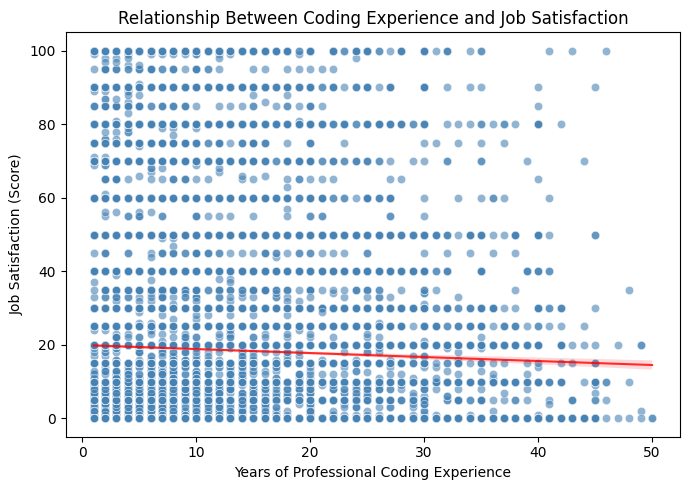

In [11]:
# --- 1. Clean data ---
# Convert to numeric (handles "Less than 1 year", etc.)
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")
df["JobSatPoints_1"] = pd.to_numeric(df["JobSatPoints_1"], errors="coerce")

# Drop rows with missing values in either column
df = df.dropna(subset=["YearsCodePro", "JobSatPoints_1"])

# --- 2. Scatter plot ---
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df,
    x="YearsCodePro",
    y="JobSatPoints_1",
    alpha=0.6,
    color="steelblue"
)

# --- 3. Add regression line (optional) ---
sns.regplot(
    data=df,
    x="YearsCodePro",
    y="JobSatPoints_1",
    scatter=False,
    color="red",
    line_kws={"linewidth": 1.5, "alpha": 0.8}
)

# --- 4. Formatting ---
plt.title("Relationship Between Coding Experience and Job Satisfaction")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction (Score)")
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [19]:
df.to_csv("modified_dataset.csv", index=False)

print("✅ Dataset saved as 'modified_dataset.csv'")

✅ Dataset saved as 'modified_dataset.csv'


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
